<a href="https://colab.research.google.com/github/Aryamaan23/CAR-PRICE-PREDICTION-PROJECT/blob/master/CAR_PRICE_PREDICTION_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train=pd.read_csv('cars.csv')
test=pd.read_csv('test.csv')

In [3]:
print("Shape of train:",train.shape)
print("Shape of test",test.shape)

Shape of train: (2000, 13)
Shape of test (509, 11)


In [4]:
train.head(10)

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,buying price,profit
0,1,781997,881997,10,72310,2,2,16,186,58,194,461803,6
1,2,553464,643464,9,72189,5,6,6,173,81,189,273747,14
2,3,1175130,1275130,10,74100,5,4,14,184,104,95,852711,11
3,4,884824,924824,4,34340,1,7,20,183,125,122,701224,11
4,5,412866,462866,5,48050,1,1,10,189,89,114,213995,3
5,6,412092,492092,8,67816,2,7,13,190,60,103,163189,12
6,7,759465,819465,6,47136,5,10,6,194,63,182,555778,18
7,8,595638,675638,8,71144,2,5,17,190,136,135,343575,10
8,9,366274,406274,4,33212,3,10,10,189,53,140,183407,15
9,10,301434,371434,7,63567,2,9,7,168,85,116,72581,14


In [5]:
test.head(10)

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque
0,1,884463,934463,5,37235,1,10,6,152,115,156
1,2,358375,448375,9,71532,5,3,8,171,70,95
2,3,925561,955561,3,21276,2,10,11,188,67,118
3,4,1190067,1210067,2,17766,3,2,14,174,97,155
4,5,419517,479517,6,49626,5,2,14,192,91,184
5,6,479277,549277,7,66283,1,9,19,192,54,157
6,7,820390,830390,1,9206,5,2,6,168,80,90
7,8,1110878,1190878,8,77912,2,1,15,178,132,146
8,9,878944,968944,9,81891,1,5,6,190,104,103
9,10,626970,686970,6,46344,1,7,20,178,137,172


In [6]:
#concat train and test
df=pd.concat((train,test))
temp_df=df
print("Shape of df:",df.shape)

Shape of df: (2509, 13)


In [9]:
#To show all the columns
pd.set_option('display.max_columns',3000)
pd.set_option('display.max_rows',85)

In [10]:
df.head(6)

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,buying price,profit
0,1,781997,881997,10,72310,2,2,16,186,58,194,461803.0,6.0
1,2,553464,643464,9,72189,5,6,6,173,81,189,273747.0,14.0
2,3,1175130,1275130,10,74100,5,4,14,184,104,95,852711.0,11.0
3,4,884824,924824,4,34340,1,7,20,183,125,122,701224.0,11.0
4,5,412866,462866,5,48050,1,1,10,189,89,114,213995.0,3.0
5,6,412092,492092,8,67816,2,7,13,190,60,103,163189.0,12.0


In [11]:
df.tail(6)

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,buying price,profit
503,504,398998,418998,2,18906,4,3,20,146,64,165,NaN,NaN
504,505,591475,661475,7,62804,5,7,18,199,68,172,NaN,NaN
505,506,1164249,1174249,1,8737,5,2,17,168,138,102,NaN,NaN
506,507,1022454,1102454,8,73784,5,8,15,153,87,120,NaN,NaN
507,508,624639,644639,2,18920,2,10,7,194,76,176,NaN,NaN
508,509,741787,751787,1,7999,4,2,8,184,83,165,NaN,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2509 entries, 0 to 508
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   v.id          2509 non-null   int64  
 1   on road old   2509 non-null   int64  
 2   on road now   2509 non-null   int64  
 3   years         2509 non-null   int64  
 4   km            2509 non-null   int64  
 5   rating        2509 non-null   int64  
 6   condition     2509 non-null   int64  
 7   economy       2509 non-null   int64  
 8   top speed     2509 non-null   int64  
 9   hp            2509 non-null   int64  
 10  torque        2509 non-null   int64  
 11  buying price  2000 non-null   float64
 12  profit        2000 non-null   float64
dtypes: float64(2), int64(11)
memory usage: 274.4 KB


In [13]:
df.describe()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,buying price,profit
count,2509.000000,2.509000e+03,2.509000e+03,2509.000000,2509.000000,2509.000000,2509.000000,2509.000000,2509.000000,2509.000000,2509.000000,2.000000e+03,2000.000000
mean,849.260662,7.428672e+05,7.985188e+05,5.565165,47269.620965,3.004384,5.461140,12.997210,170.082503,95.271821,139.407732,5.267934e+05,10.464500
std,600.090923,2.600877e+05,2.623591e+05,2.872808,25119.379554,1.433390,2.918446,4.391841,17.460755,26.118035,35.212625,2.637678e+05,3.403606
min,1.000000,3.007840e+05,3.112900e+05,1.000000,7023.000000,1.000000,1.000000,6.000000,140.000000,50.000000,80.000000,-3.412700e+04,3.000000
25%,314.000000,5.201290e+05,5.769760e+05,3.000000,25932.000000,2.000000,3.000000,9.000000,155.000000,73.000000,108.000000,3.049825e+05,8.000000
50%,746.000000,7.388980e+05,7.907960e+05,6.000000,46362.000000,3.000000,5.000000,13.000000,170.000000,95.000000,139.000000,5.286965e+05,10.000000
75%,1373.000000,9.675020e+05,1.027654e+06,8.000000,68058.000000,4.000000,8.000000,17.000000,185.000000,118.000000,169.000000,7.507372e+05,13.000000
max,2000.000000,1.199860e+06,1.299078e+06,10.000000,99970.000000,5.000000,10.000000,20.000000,200.000000,140.000000,200.000000,1.032874e+06,18.000000


In [15]:
df.select_dtypes(include=['int']).columns

Index(['v.id', 'on road old', 'on road now', 'years', 'km ', 'rating',
       'condition', 'economy', 'top speed', 'hp', 'torque'],
      dtype='object')

In [16]:
df=df.set_index("v.id")


In [17]:
df.head(6)

,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,buying price,profit
v.id,,,,,,,,,,,,
1,781997,881997,10,72310,2,2,16,186,58,194,461803.0,6.0
2,553464,643464,9,72189,5,6,6,173,81,189,273747.0,14.0
3,1175130,1275130,10,74100,5,4,14,184,104,95,852711.0,11.0
4,884824,924824,4,34340,1,7,20,183,125,122,701224.0,11.0
5,412866,462866,5,48050,1,1,10,189,89,114,213995.0,3.0
6,412092,492092,8,67816,2,7,13,190,60,103,163189.0,12.0


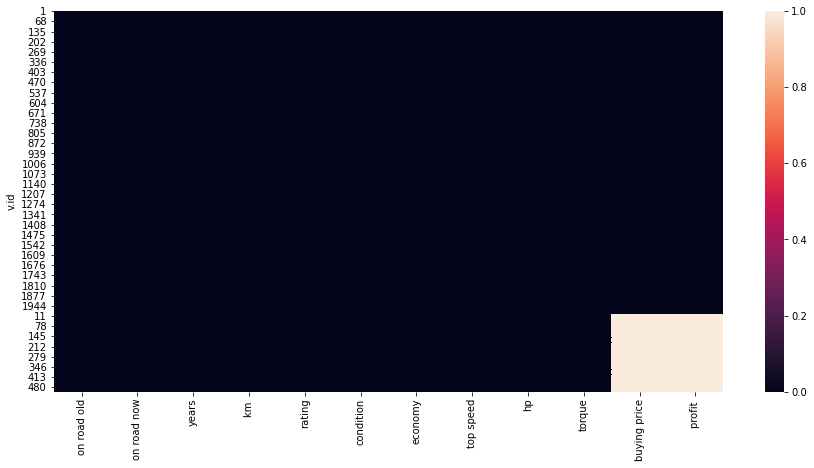

In [19]:
plt.figure(figsize=(15,7))
sns.heatmap(df.isnull())

In [21]:
null_percent=df.isnull().sum()/df.shape[0]*100
null_percent

on road old      0.000000
on road now      0.000000
years            0.000000
km               0.000000
rating           0.000000
condition        0.000000
economy          0.000000
top speed        0.000000
hp               0.000000
torque           0.000000
buying price    20.286967
profit          20.286967
dtype: float64

In [22]:
col_for_drop=null_percent[null_percent>20].keys()

In [23]:
df=df.drop(col_for_drop,"columns")
df.shape

(2509, 10)

In [24]:
for i in df.columns:
  print(i + "\t" + str(len(df[i].unique())))

on road old	2505
on road now	2507
years	10
km 	2400
rating	5
condition	10
economy	15
top speed	61
hp	91
torque	121


In [25]:
for i in df.columns:
  print("Unique value of:>>> {} ({})\n{}\n".format(i,len(df[i].unique()),df[i].unique()))

Unique value of:>>> on road old (2505)
[ 781997  553464 1175130 ... 1022454  624639  741787]

Unique value of:>>> on road now (2507)
[ 881997  643464 1275130 ... 1102454  644639  751787]

Unique value of:>>> years (10)
[10  9  4  5  8  6  7  1  3  2]

Unique value of:>>> km  (2400)
[72310 72189 74100 ... 73784 18920  7999]

Unique value of:>>> rating (5)
[2 5 1 3 4]

Unique value of:>>> condition (10)
[ 2  6  4  7  1 10  5  9  3  8]

Unique value of:>>> economy (15)
[16  6 14 20 10 13 17  7  9 18 15  8 11 12 19]

Unique value of:>>> top speed (61)
[186 173 184 183 189 190 194 168 171 149 180 163 162 147 165 170 154 157
 199 153 185 182 176 160 195 141 142 156 169 145 166 158 150 172 167 164
 177 146 140 155 188 161 187 175 197 200 178 148 152 144 196 198 174 179
 159 143 181 193 151 192 191]

Unique value of:>>> hp (91)
[ 58  81 104 125  89  60  63 136  53  85  65 100  87 140  94 114  97  64
  62 107 122  79 138 113 133 111 105  90  71  80  70 135  93  56 115 129
 132  99  88  69  74 1

In [26]:
train['buying price'].describe()

count    2.000000e+03
mean     5.267934e+05
std      2.637678e+05
min     -3.412700e+04
25%      3.049825e+05
50%      5.286965e+05
75%      7.507372e+05
max      1.032874e+06
Name: buying price, dtype: float64

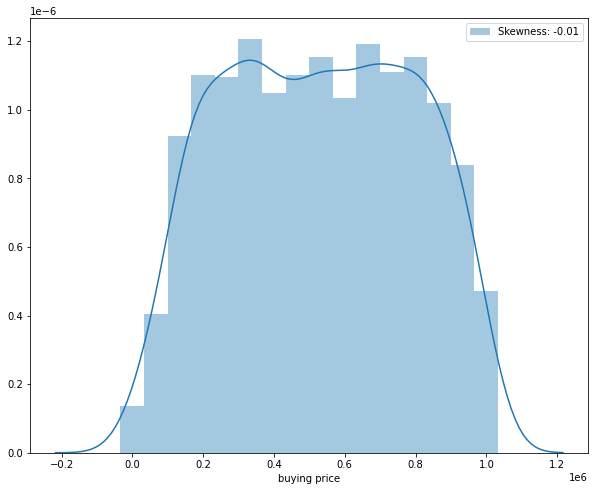

In [27]:
plt.figure(figsize=(10,8))
bar=sns.distplot(train['buying price'])
bar.legend(['Skewness: {:.2f}'.format(train['buying price'].skew())])

(13.5, -0.5)

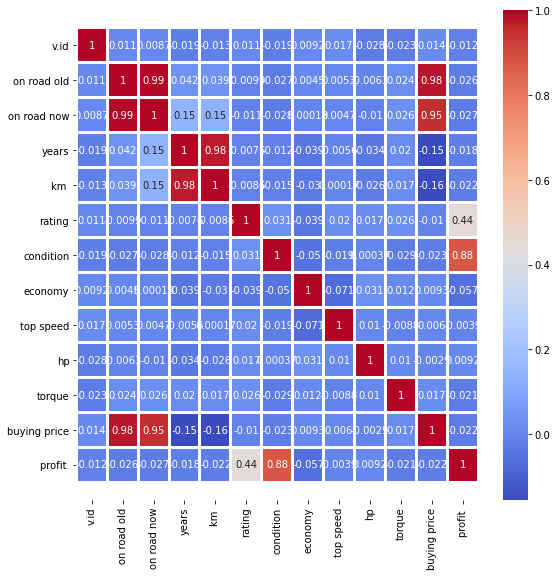

In [30]:
plt.figure(figsize=(9,9))
ax=sns.heatmap(train.corr(),cmap="coolwarm",annot=True,linewidth=2)
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)

In [35]:
hig_corr=train.corr()
hig_corr_features=hig_corr.index[abs(hig_corr['buying price']) >=0.5]
hig_corr_features

Index(['on road old', 'on road now', 'buying price'], dtype='object')

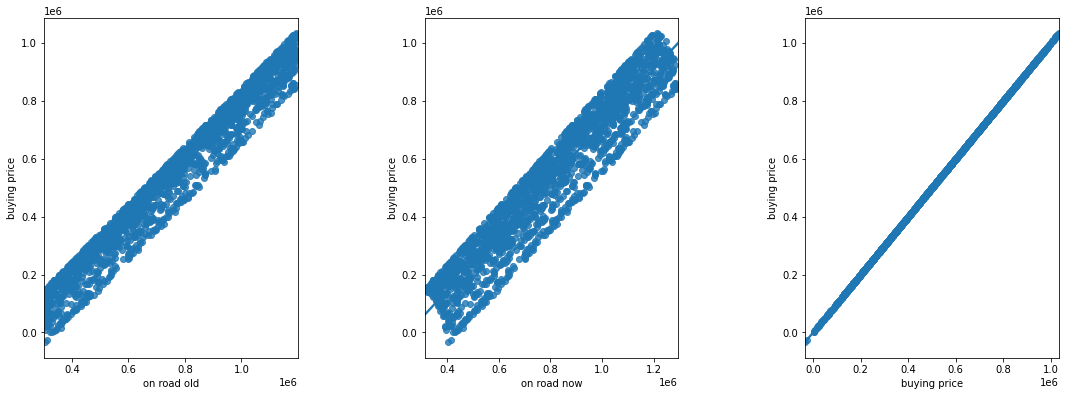

In [43]:
plt.figure(figsize=(25,25))
for i in range(len(high_corr_features)):
  if i<=9:
    plt.subplot(3,4,i+1)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.regplot(data=train,x=high_corr_features[i],y='buying price')

In [44]:
missing_col=df.columns[df.isnull().any()]
missing_col

Index([], dtype='object')

In [57]:
import numpy as np
Buying_price=train['buying price']

In [48]:
obj_feat=list(df.loc[:,df.dtypes=='object'].columns.values)
len(obj_feat)

0

In [49]:
df.shape

(2509, 10)

In [65]:
train_len=len(train)

In [66]:
X_train=df[:train_len]
X_test=df[train_len:]
y_train=Buying_price
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(2000, 10)
(509, 10)
(2000,)


In [96]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import make_scorer,r2_score
def test_model(model,X_train=X_train,y_train=y_train):
  cv=KFold(n_splits=3,shuffle=True,random_state=45)
  r2=make_scorer(r2_score)
  r2_val_score=cross_val_score(model,X_train,y_train,cv=cv,scoring=r2)
  score=[r2_val_score.mean()]
  return score

In [84]:
import sklearn.linear_model as linear_model
LR=linear_model.LinearRegression()
LR.fit(X_train,y_train)
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
y_pred=LR.predict(X_test).astype(int)

In [97]:
test_model(LR)

[0.9956852622456099]

In [85]:
y_pred.astype(int)

array([ 681901,   83638,  758963, 1035234,  192455,  229857,  684864,
        840223,  596934,  402905,  132066,  843308,  773448,  771293,
        863245,  890812,  687022,  109958,  674626,  136703,  300546,
        580372,  391329,  816279,  126821,  297894,  786623,  817073,
        142585,   75577,  326626,  416104,  182072,  537233,  873193,
        646015,  300441,  289784,  481059,  356739,  712422,  472689,
        531407,  271226,  697520,  869433,  846831,  375378,  506282,
        395470,  265528,  972582,  157503,  207672,  107580,  311045,
        127988,  366946,  594078,   73402,  438233,  613327,  454374,
        861142,  502784,  193131,  855928,  621476,  545367,  119844,
        364048,  601597,  838349,  503179,  298627,  693385,  398168,
        832972,  594990,   57123,  766065,  667877,  713305,  735523,
        800682,  923997,  695996,  298083,  305983,  151871,  175488,
        945563, 1011784,  358996,  410545,  679824,  901512,  928479,
        930762,  399

In [86]:
submit_test1=pd.concat([test['v.id'],pd.DataFrame(y_pred)],axis=1)
submit_test1.columns=['v.id','buying_price']

In [87]:
submit_test1

,v.id,buying_price
0,1,681901
1,2,83638
2,3,758963
3,4,1035234
4,5,192455
...,...,...
504,505,343209
505,506,1026639
506,507,755851
507,508,469297


In [99]:
submit_test1.to_csv('sample_submission.csv',index=False)


In [100]:
f=open('sample_submission.csv','r')
f.read()

'v.id,buying_price\n1,681901\n2,83638\n3,758963\n4,1035234\n5,192455\n6,229857\n7,684864\n8,840223\n9,596934\n10,402905\n11,132066\n12,843308\n13,773448\n14,771293\n15,863245\n16,890812\n17,687022\n18,109958\n19,674626\n20,136703\n21,300546\n22,580372\n23,391329\n24,816279\n25,126821\n26,297894\n27,786623\n28,817073\n29,142585\n30,75577\n31,326626\n32,416104\n33,182072\n34,537233\n35,873193\n36,646015\n37,300441\n38,289784\n39,481059\n40,356739\n41,712422\n42,472689\n43,531407\n44,271226\n45,697520\n46,869433\n47,846831\n48,375378\n49,506282\n50,395470\n51,265528\n52,972582\n53,157503\n54,207672\n55,107580\n56,311045\n57,127988\n58,366946\n59,594078\n60,73402\n61,438233\n62,613327\n63,454374\n64,861142\n65,502784\n66,193131\n67,855928\n68,621476\n69,545367\n70,119844\n71,364048\n72,601597\n73,838349\n74,503179\n75,298627\n76,693385\n77,398168\n78,832972\n79,594990\n80,57123\n81,766065\n82,667877\n83,713305\n84,735523\n85,800682\n86,923997\n87,695996\n88,298083\n89,305983\n90,151871\n91